vsUncorrected=0.020099637626505795 \pm 0.0036176226865258284
vsCorrected=0.028770154703869726 \pm 0.004713178746059025


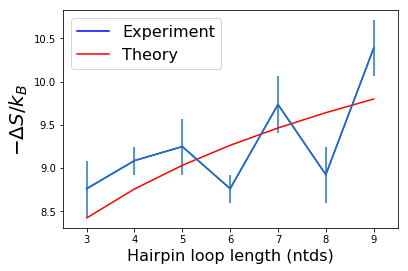

In [5]:
import numpy
import matplotlib.pyplot as plt
import scipy.optimize as optimize
import scipy.stats

b = 0.8/(0.33) #ss RNA persistence length in units of ntds (as a length)
kB = 0.0019872 #Boltzmann's constant in units of kcal/(mol*Kelvin)

def fitFunctionUncorrected(s, vs): #defines a function of this form
    return -(numpy.log(vs) + numpy.log((3./(2.*numpy.pi*s*b))**(3./2) ))
    
def fitFunctionCorrected(s, vs): #defines a function of this form
    return -(numpy.log(vs) + numpy.log((3./(2.*numpy.pi*s*b))**(3./2) *(1 - 15.*b/(20.*s))))
    

s = numpy.arange(4,11) #hairpin loop entropies we'll consider.
#what we call here four ntds in a hairpin loop, the rest of the field calls three ntds 
#(because we consider single-stranded RNA as a random walk of length (x+1)/b 
#where x is the number of ntds in the loop (not base paired))
#We plot the figure with the number of ntds in the loop defined as the rest of the field defines it,
#but internally to this program, we'll deal with s ranging from 4 to 10 instead of calling it 3 to 9 as it's plotted.

#deltaG = [4.1, 4.9, 4.4, 5., 5., 5.1, 5.2] #experimental results from Serra & Turner
deltaG = [5.4, 5.6, 5.7, 5.4, 6.0, 5.5, 6.4] #experimental results from 
#"Incorporating chemical modification constraints into a dynamic programming algorithm 
#for prediction of RNA secondary structure"

deltaGErr = [0.2, 0.1, 0.2, 0.1, 0.2, 0.2, 0.2]

entropyExp = [i/(310.15*kB) for i in deltaG]
entropyErr = [i/(310.15*kB) for i in deltaGErr]

initialGuess = [0.02] #can play with this quite a lot and get the same result
fittedVsUncorrected, covariance = optimize.curve_fit(fitFunctionUncorrected, xdata=s,
            ydata=entropyExp, p0=initialGuess
            ,sigma = entropyErr
            )
errVsUncorrected = numpy.sqrt(covariance[0][0])
fittedVsUncorrected = fittedVsUncorrected[0]

fittedVsCorrected, covariance = optimize.curve_fit(fitFunctionCorrected, xdata=s,
            ydata=entropyExp, p0=initialGuess
            ,sigma = entropyErr
            )
errVsCorrected = numpy.sqrt(covariance[0][0])
fittedVsCorrected = fittedVsCorrected[0]

print("vsUncorrected=" + str(fittedVsUncorrected) + " \pm " + str(errVsUncorrected))
print("vsCorrected=" + str(fittedVsCorrected) + " \pm " + str(errVsCorrected))

textString = ('$v_s$' +
    #'uncorrected' +
    '$={0:6.4f} \pm {1:4.4f}$ ntds$^3$ \n' 
    #+r'$v_s$ corrected'+ '$={2:8.3f} \pm {3:6.3f}$ ntds$^3$'
    ).format(
        fittedVsUncorrected, errVsUncorrected
        #, fittedVsCorrected, errVsCorrected
        )

fittedCurveUncorrected = fitFunctionUncorrected(s, fittedVsUncorrected) 
fittedCurveCorrected = fitFunctionCorrected(s, fittedVsCorrected) 
fittedCurveTest = fitFunctionCorrected(s, 0.5) 

plt.errorbar(s-1,entropyExp,entropyErr)
plt.plot(s-1,entropyExp,'b',label='Experiment')
plt.plot(s-1,fittedCurveUncorrected,'r',label='Theory')
#plt.plot(s-1,fittedCurveCorrected,'g',label='Corrected')
plt.xlim([min(s)-1.5,max(s)-0.5])

plt.xlabel('Hairpin loop length (ntds)',fontsize=16)
plt.ylabel('$-\Delta S/k_B$',fontsize=20)
plt.legend(loc='upper left',fontsize = 16)

plt.show()